### Exercise 2 a

I downloaded the txt-file by writing:
``` curl -O https://www.gutenberg.org/files/74/74-0.txt ```
in the terminal

### Exercise 2 b
I removed everything at the top and also find-and-replace all lines with CHAPTER as start.

### Exercise 2 c


In [1]:
import re

# All the words in the text will be in this list.
all_words = []
# Open the text
fh = open('tomsawyer.txt')
# for every line in the txt-file
for line in fh:
    # Substitute all non-alphenumeric symbol with ''
    synthline = re.sub(r'[^\w\s]','', line)
    # split the words. wordsInLine is a list.
    wordsInLine = synthline.split()
    # Since I would like case folding, I make a new list with lowered characters. This may take some time, since I'm iterating through the text two times in theory
    caseFolding = [w.lower()for w in wordsInLine]
    # Adding the words to the main word-list
    all_words.extend(caseFolding)
fh.close()

### Exercise 2 d

In [2]:
import nltk
import pandas as pd
import numpy as np

In [3]:
allWordsFreqDist = nltk.FreqDist(all_words)
twentyWordsFreqDist = allWordsFreqDist.most_common(20)
data = {}
for k, v in twentyWordsFreqDist:
    data[k] = v

test_frame = pd.DataFrame.from_dict(data, orient='index', columns=['Absolute frequency'])
test_frame

,Absolute frequency
the,3839
and,3055
a,1849
to,1781
of,1549
he,1179
was,1166
it,1125
in,990
that,900


### Exercise 2 e


In [4]:
freqfreq = {
    "1" : 0,
    "2" : 0,
    "3" : 0,
    "4" : 0,
    "5" : 0,
    "6" : 0,
    "7" : 0,
    "8" : 0,
    "9" : 0,
    "10" : 0,
    "11-50" : 0,
    "51-100" : 0,
    "Over 100" : 0,
}

for key in dict(allWordsFreqDist):
    if allWordsFreqDist[key] == 1:
        freqfreq["1"] = freqfreq["1"] + 1
    elif allWordsFreqDist[key] == 2:
        freqfreq["2"] = freqfreq["2"] + 1
    elif allWordsFreqDist[key] == 3:
        freqfreq["3"] = freqfreq["3"] + 1
    elif allWordsFreqDist[key] == 4:
        freqfreq["4"] = freqfreq["4"] + 1
    elif allWordsFreqDist[key] == 5:
        freqfreq["5"] = freqfreq["5"] + 1
    elif allWordsFreqDist[key] == 6:
        freqfreq["6"] = freqfreq["6"] + 1
    elif allWordsFreqDist[key] == 7:
        freqfreq["7"] = freqfreq["7"] + 1
    elif allWordsFreqDist[key] == 8:
        freqfreq["8"] = freqfreq["8"] + 1
    elif allWordsFreqDist[key] == 9:
        freqfreq["9"] = freqfreq["9"] + 1
    elif allWordsFreqDist[key] == 10:
        freqfreq["10"] = freqfreq["10"] + 1
    elif allWordsFreqDist[key] > 10 and allWordsFreqDist[key] < 51:
        freqfreq["11-50"] = freqfreq["11-50"] + 1
    elif allWordsFreqDist[key] > 50 and allWordsFreqDist[key] < 100:
        freqfreq["51-100"] = freqfreq["51-100"] + 1
    else:
        freqfreq["Over 100"] = freqfreq["Over 100"] + 1

df = pd.DataFrame.from_dict(freqfreq, orient='index', columns=['Frequency of frequency'])
df

,Frequency of frequency
1,4625
2,1310
3,623
4,423
5,232
6,191
7,163
8,129
9,81
10,98


### Exercise 2 f

In [5]:
zips = []
for r, n in enumerate(data):
    zips.append((r+1)*data[n])

test_frame["zipf\'s law"] = zips
test_frame

,Absolute frequency,zipf's law
the,3839,3839
and,3055,6110
a,1849,5547
to,1781,7124
of,1549,7745
he,1179,7074
was,1166,8162
it,1125,9000
in,990,8910
that,900,9000


If I had no mistakes and all the numbers are correct, then Zipf's law did pretty well. it hovers at high 8000's and low 10000's apart from the first few words.

### Exercise 2 g

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

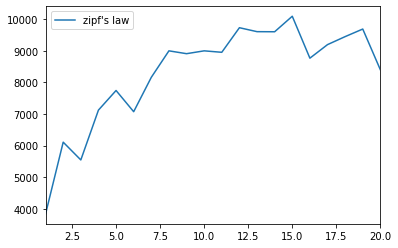

In [7]:
test_frame = test_frame.set_index([pd.Index(list(range(1,21)))])
test_frame
ax = test_frame.plot(kind='line',y='zipf\'s law')